In [1]:
import pandas as pd
import re

# Read the list of filenames from the configuration file
with open('file_list.txt', 'r', encoding='utf-8') as config_file:
    file_names = config_file.read().splitlines()

# Regex pattern to match the data format
pattern = r'\[(.*?)\] (.*?): (.*)'


# Initialize an empty list to store parsed data
datalist = []
stream_count = 0
# Iterate over each specified file
for file in file_names:
    full_path = file
    with open(full_path, 'r', encoding='utf-8') as f:
        lines = f.readlines()
        for line in lines:
            match = re.match(pattern, line)
            if match:
                date, user, message = match.groups()
                datalist.append([date, user, message,stream_count])
    stream_count = stream_count + 1

# Create a DataFrame from the parsed data
data = pd.DataFrame(datalist, columns=["date", "user", "message","stream"])

In [2]:
#MAY 20 data is missing

In [3]:
data['date'] = pd.to_datetime(data['date'])

data = data.sort_values(by=['user', 'date'])

In [4]:
data['first_message'] = data.groupby('user').cumcount().apply(lambda x: 1 if x == 0 else 0)

data.head(10)

,date,user,message,stream,first_message
10789,2024-05-05 16:24:24+00:00,00001joel,you ever tried snus?,4,1
12356,2024-05-05 19:53:34+00:00,00001joel,you have a boyfriend???,4,0
12361,2024-05-05 19:54:18+00:00,00001joel,:(,4,0
13132,2024-05-06 15:38:41+00:00,00001joel,whats your favourite snus!,5,0
224481,2024-07-30 15:10:31+00:00,000mrx,wtcnBay,77,1
38876,2024-05-17 18:36:08+00:00,00ramez00,my friend loves u,14,1
208656,2024-07-25 14:15:23+00:00,04lennart04,do you drink beer?,73,1
208777,2024-07-25 14:23:58+00:00,04lennart04,Malle,73,0
208792,2024-07-25 14:24:45+00:00,04lennart04,try moneyboy,73,0
107447,2024-06-11 15:38:40+00:00,062_davi,hello,38,1


In [5]:
data[data['user'] == 'balintboss']

,date,user,message,stream,first_message
21,2024-05-01 15:06:18+00:00,balintboss,ready to 1984,0,1
60,2024-05-01 15:10:39+00:00,balintboss,ADHD,0,0
69,2024-05-01 15:11:14+00:00,balintboss,hell no,0,0
84,2024-05-01 15:12:31+00:00,balintboss,hike,0,0
146,2024-05-01 15:18:24+00:00,balintboss,o7,0,0
...,...,...,...,...,...
235698,2024-08-02 18:56:13+00:00,balintboss,she pause his timer when sleep,80,0
235701,2024-08-02 18:56:48+00:00,balintboss,he*,80,0
235727,2024-08-02 18:58:49+00:00,balintboss,o7,80,0
235729,2024-08-02 18:59:14+00:00,balintboss,bye,80,0


In [6]:
data['first_message'].describe()

count    235746.000000
mean          0.028208
std           0.165568
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: first_message, dtype: float64

In [7]:
#unique chaterrs each stream
unique_chatters_per_stream = data.groupby('stream')['user'].nunique()

In [8]:
# Calculate the number of first messages per stream
first_messages_per_stream = data.groupby('stream')['first_message'].sum()


# Calculate the total number of messages per stream
total_messages_per_stream = data['stream'].value_counts()

# Combine the results into a single DataFrame
stream_stats = pd.DataFrame({
    'first_messages': first_messages_per_stream,
    'total_messages': total_messages_per_stream,
    'unique_chatters': unique_chatters_per_stream
})


stream_stats

,first_messages,total_messages,unique_chatters
stream,,,
0,177,1985,177
1,150,3046,213
2,104,2754,185
3,84,2375,184
4,76,2455,182
...,...,...,...
76,154,5389,459
77,79,2671,292
78,115,4261,365


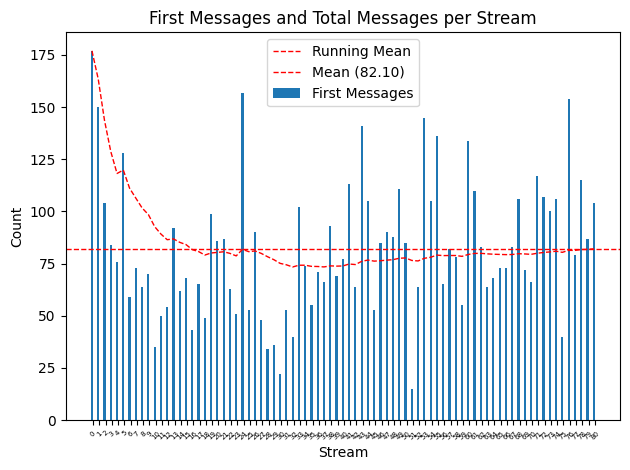

In [9]:
import matplotlib.pyplot as plt


# Plot the chart
fig, ax = plt.subplots()

# Bar width
bar_width = 0.35

# Bar positions
index = range(len(stream_stats))

# Bar plots
bar1 = ax.bar(index, stream_stats['first_messages'], bar_width, label='First Messages')

# Calculate mean of first messages
mean_first_messages = stream_stats['first_messages'].mean()

stream_stats['first_messages_avg'] = stream_stats['first_messages'].expanding().mean()

# Plot the running mean line
ax.plot(index, stream_stats['first_messages_avg'], color='r', linestyle='--', linewidth=1, label='Running Mean')

# Draw the mean line
ax.axhline(mean_first_messages, color='r', linestyle='--', linewidth=1, label=f'Mean ({mean_first_messages:.2f})')

# Labels and title
ax.set_xlabel('Stream', fontsize=10)
ax.set_ylabel('Count', fontsize=10)
ax.set_title('First Messages and Total Messages per Stream', fontsize=12)
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(stream_stats.index, fontsize=5)  # Adjust x-tick labels font size
ax.legend(fontsize=10)

# Display the plot
plt.xticks(rotation=45)  # Rotate x labels if necessary
plt.tight_layout()
plt.show()


In [10]:
data[data['stream']== 50].head(10)

,date,user,message,stream,first_message
145549,2024-06-25 12:46:37+00:00,1206paul_,I LOVEEEEEEE COUNTERSTRIKE BatChest,50,0
145554,2024-06-25 12:46:58+00:00,1206paul_,!video,50,0
145580,2024-06-25 12:50:03+00:00,1206paul_,I'm SOOOOO MUCH FUN BatChest,50,0
145591,2024-06-25 12:50:43+00:00,1206paul_,croatia might not make it past group stage,50,0
145601,2024-06-25 12:51:12+00:00,1206paul_,Germany qualified happi,50,0
145624,2024-06-25 12:52:09+00:00,1206paul_,guys guys guys watch the newest video!!! happ...,50,0
145626,2024-06-25 12:52:11+00:00,1206paul_,!video,50,0
145629,2024-06-25 12:52:14+00:00,1206paul_,BatChestAbove,50,0
145636,2024-06-25 12:52:32+00:00,1206paul_,@klimzaa SPOILERS,50,0
145637,2024-06-25 12:52:34+00:00,1206paul_,ArnoldHalt,50,0


In [11]:
stream_stats.describe()

,first_messages,total_messages,unique_chatters,first_messages_avg
count,81.000000,81.000000,81.000000,81.000000
mean,82.098765,2910.444444,254.802469,84.929182
std,32.324760,1130.670553,73.017878,18.497979
min,15.000000,796.000000,93.000000,73.393939
25%,63.000000,2089.000000,200.000000,76.897959
50%,77.000000,2671.000000,245.000000,79.642857
75%,104.000000,3628.000000,314.000000,81.705882
max,177.000000,7033.000000,459.000000,177.000000


In [12]:
# Calculate the time difference between the first and last messages for each stream
stream_lengths = data.groupby('stream')['date'].agg(lambda x: (x.max() - x.min()).total_seconds())

# Add the stream_length column to the stream_stats DataFrame
stream_stats['stream_length'] = stream_lengths

In [13]:
stream_stats.head(10)

,first_messages,total_messages,unique_chatters,first_messages_avg,stream_length
stream,,,,,
0,177,1985,177,177.000000,17697.0
1,150,3046,213,163.500000,17831.0
2,104,2754,185,143.666667,19147.0
3,84,2375,184,128.750000,17451.0
4,76,2455,182,118.200000,18734.0
5,128,4276,278,119.833333,20382.0
6,59,2004,164,111.142857,16563.0
7,73,2340,205,106.375000,17773.0
8,64,2838,192,101.666667,18686.0


In [14]:
stream_stats['stream_length_hour'] = stream_stats['stream_length'] /60 /60

In [15]:
stream_stats.head(5)

,first_messages,total_messages,unique_chatters,first_messages_avg,stream_length,stream_length_hour
stream,,,,,,
0,177,1985,177,177.000000,17697.0,4.915833
1,150,3046,213,163.500000,17831.0,4.953056
2,104,2754,185,143.666667,19147.0,5.318611
3,84,2375,184,128.750000,17451.0,4.847500
4,76,2455,182,118.200000,18734.0,5.203889


In [16]:
stream_stats['stream_length_per_firt'] = stream_stats['first_messages'] / stream_stats['stream_length_hour'] 

In [17]:
stream_stats.head(20)

,first_messages,total_messages,unique_chatters,first_messages_avg,stream_length,stream_length_hour,stream_length_per_firt
stream,,,,,,,
0,177,1985,177,177.000000,17697.0,4.915833,36.006103
1,150,3046,213,163.500000,17831.0,4.953056,30.284336
2,104,2754,185,143.666667,19147.0,5.318611,19.553977
3,84,2375,184,128.750000,17451.0,4.847500,17.328520
4,76,2455,182,118.200000,18734.0,5.203889,14.604462
5,128,4276,278,119.833333,20382.0,5.661667,22.608184
6,59,2004,164,111.142857,16563.0,4.600833,12.823764
7,73,2340,205,106.375000,17773.0,4.936944,14.786474
8,64,2838,192,101.666667,18686.0,5.190556,12.330087


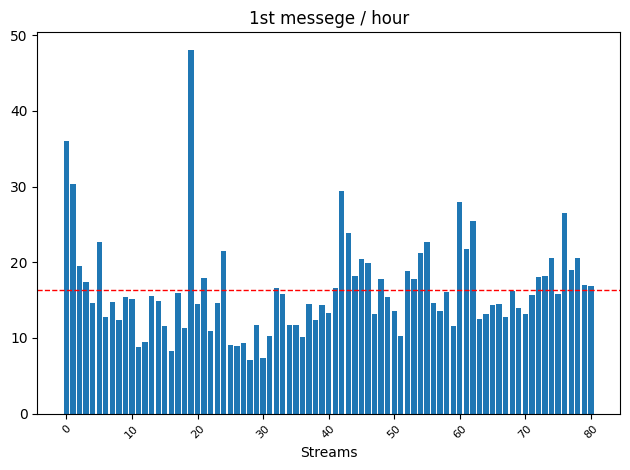

In [18]:
# Plot the chart
fig, ax = plt.subplots()

# Bar plot for stream_length_per_first
ax.bar(stream_stats.index, stream_stats['stream_length_per_firt'])

# Calculate mean of first messages
mean_stream_length_per_firt = stream_stats['stream_length_per_firt'].mean()

# Draw the mean line
ax.axhline(mean_stream_length_per_firt, color='r', linestyle='--', linewidth=1, label=f'Mean ({mean_stream_length_per_firt:.2f})')

# Labels and title
ax.set_xlabel('Streams', fontsize=10)
ax.set_title('1st messege / hour', fontsize=12)

# Display the plot
plt.xticks(rotation=45, fontsize=8)  # Rotate x labels if necessary
plt.tight_layout()
plt.show()

In [19]:
stream_stats['stream_length_per_firt'].describe()

count    81.000000
mean     16.386985
std       6.449704
min       7.022375
25%      12.469557
50%      15.131500
75%      18.180069
max      47.967699
Name: stream_length_per_firt, dtype: float64

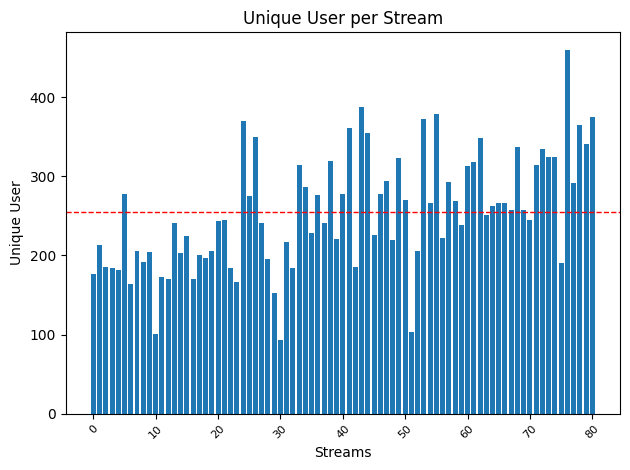

In [20]:
# Plot the chart
fig, ax = plt.subplots()

# Bar plot for stream_length_per_first
ax.bar(stream_stats.index, stream_stats['unique_chatters'])

# Calculate mean of first messages
mean_stream_unique = stream_stats['unique_chatters'].mean()

# Draw the mean line
ax.axhline(mean_stream_unique, color='r', linestyle='--', linewidth=1, label=f'Mean ({mean_stream_unique:.2f})')

# Labels and title
ax.set_xlabel('Streams', fontsize=10)
ax.set_ylabel('Unique User', fontsize=10)
ax.set_title('Unique User per Stream', fontsize=12)

# Display the plot
plt.xticks(rotation=45, fontsize=8)  # Rotate x labels if necessary
plt.tight_layout()
plt.show()

In [21]:
stream_stats['unique_chatters_per_hour'] = stream_stats['unique_chatters'] / stream_stats['stream_length_hour']

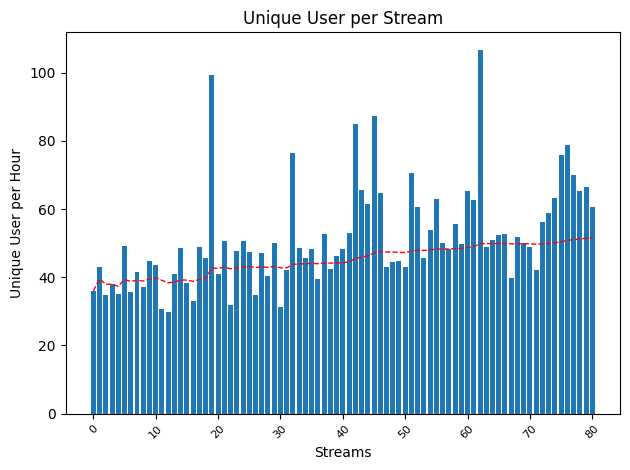

In [22]:
# Plot the chart
fig, ax = plt.subplots()

# Bar plot for stream_length_per_first
ax.bar(stream_stats.index, stream_stats['unique_chatters_per_hour'])

# Calculate mean of first messages
stream_stats['unique_chatters_per_hour_avg'] = stream_stats['unique_chatters_per_hour'].expanding().mean()

# Plot the running mean line
ax.plot(index, stream_stats['unique_chatters_per_hour_avg'], color='r', linestyle='--', linewidth=1, label='Running Mean')

# Labels and title
ax.set_xlabel('Streams', fontsize=10)
ax.set_ylabel('Unique User per Hour', fontsize=10)
ax.set_title('Unique User per Stream', fontsize=12)

# Display the plot
plt.xticks(rotation=45, fontsize=8)  # Rotate x labels if necessary
plt.tight_layout()
plt.show()

In [23]:
# Group by stream and aggregate users
stream_users = data.groupby('stream')['user'].apply(set).reset_index()
stream_users.columns = ['stream', 'users']

# Initialize columns for returning users and their count
stream_users['returning_users'] = [set()] * len(stream_users)
stream_users['returning_count'] = 0

# Loop through streams to identify returning users
for i in range(1, len(stream_users)):
    current_users = stream_users.at[i, 'users']
    previous_users = stream_users.at[i - 1, 'users']
    
    # Identify returning users
    returning_users = current_users.intersection(previous_users)
    
    # Update dataframe with returning users and their count
    stream_users.at[i, 'returning_users'] = returning_users
    stream_users.at[i, 'returning_count'] = len(returning_users)

stream_users.head(10)

,stream,users,returning_users,returning_count
0,0,"{Alkis_Koliass, utaBz, blackbizom, nobodycares...",{},0
1,1,"{androo0edits, Alkis_Koliass, UncleKappa69, NS...","{popdamollyy, Alkis_Koliass, c4deszes, Niibler...",63
2,2,"{kecso1g, 5eathersMcGraw, Stormiin, ekin_b_jor...","{popdamollyy, Goon_The_Boon, StreamElements, N...",70
3,3,"{lilmudi123, n69ky, Lev1tate_fps, alsaqr1, snu...","{popdamollyy, Preferx, eflainel, StreamElement...",71
4,4,"{eugeneprunk, kecso1g, utaBz, NSAPartyVan, fra...","{popdamollyy, Preferx, eflainel, corpoket, noy...",62
5,5,"{Redot_l_, UncleKappa69, MagicMarmot, utaBz, g...","{utaBz, NSAPartyVan, whiteknightnipples, ayyow...",80
6,6,"{AVESH0, utaBz, NSAPartyVan, n69ky, frankonthe...","{utaBz, NSAPartyVan, whiteknightnipples, Raven...",78
7,7,"{kecso1g, utaBz, Nab1337, dima_wallhacks, fran...","{c4deszes, utaBz, corpoket, Goon_The_Boon, Str...",64
8,8,"{ostkroken744, spelredszellsurp, utaBz, Abblin...","{pfftsmh, c4deszes, Substen, utaBz, corpoket, ...",76
9,9,"{posheltynahuietodostuno, UncleKappa69, spyros...","{Roddeboiii, pfftsmh, c4deszes, Substen, utaBz...",68


In [24]:
stream_stats.head(2)

,first_messages,total_messages,unique_chatters,first_messages_avg,stream_length,stream_length_hour,stream_length_per_firt,unique_chatters_per_hour,unique_chatters_per_hour_avg
stream,,,,,,,,,
0,177,1985,177,177.0,17697.0,4.915833,36.006103,36.006103,36.006103
1,150,3046,213,163.5,17831.0,4.953056,30.284336,43.003758,39.504930


In [25]:
stream_stats = pd.merge(stream_stats, stream_users, on='stream', how='right')

stream_stats.head(2)

,stream,first_messages,total_messages,unique_chatters,first_messages_avg,stream_length,stream_length_hour,stream_length_per_firt,unique_chatters_per_hour,unique_chatters_per_hour_avg,users,returning_users,returning_count
0,0,177,1985,177,177.0,17697.0,4.915833,36.006103,36.006103,36.006103,"{Alkis_Koliass, utaBz, blackbizom, nobodycares...",{},0
1,1,150,3046,213,163.5,17831.0,4.953056,30.284336,43.003758,39.504930,"{androo0edits, Alkis_Koliass, UncleKappa69, NS...","{popdamollyy, Alkis_Koliass, c4deszes, Niibler...",63


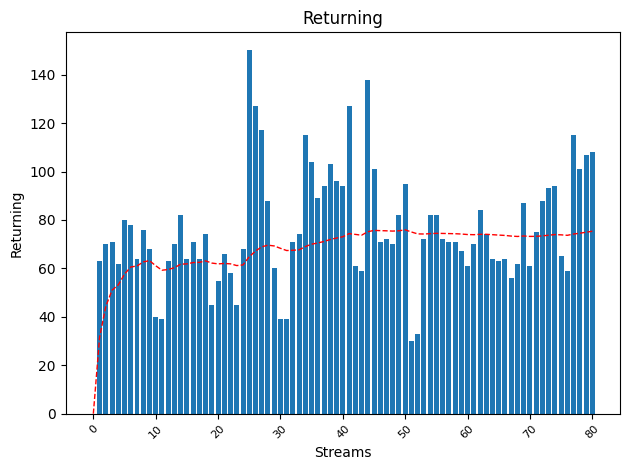

In [26]:
# Plot the chart
fig, ax = plt.subplots()

# Bar plot for stream_length_per_first
ax.bar(stream_stats.index, stream_stats['returning_count'])

# Calculate mean of first messages
stream_stats['returning_count_avg'] = stream_stats['returning_count'].expanding().mean()

# Plot the running mean line
ax.plot(index, stream_stats['returning_count_avg'], color='r', linestyle='--', linewidth=1, label='Running Mean')

# Labels and title
ax.set_xlabel('Streams', fontsize=10)
ax.set_ylabel('Returning', fontsize=10)
ax.set_title('Returning', fontsize=12)

# Display the plot
plt.xticks(rotation=45, fontsize=8)  # Rotate x labels if necessary
plt.tight_layout()
plt.show()

In [27]:
# Path to your Excel file
file_path = 'DorozeaStreamStats.xlsx'

# Reading a specific sheet with custom column names and skipping the first two rows
exelStats = pd.read_excel(file_path, sheet_name='Munkalap1', header=None, names=['stream', 'avg', 'max','follow'], skiprows=1)

# Display the DataFrame
exelStats.head(5)

,stream,avg,max,follow
0,0,129,145,9
1,1,152,290,24
2,2,126,161,12
3,3,133,169,21
4,4,148,177,67


In [28]:
stream_stats = pd.merge(stream_stats, exelStats, on='stream', how='right')

stream_stats.head(5)

,stream,first_messages,total_messages,unique_chatters,first_messages_avg,stream_length,stream_length_hour,stream_length_per_firt,unique_chatters_per_hour,unique_chatters_per_hour_avg,users,returning_users,returning_count,returning_count_avg,avg,max,follow
0,0,177.0,1985.0,177.0,177.000000,17697.0,4.915833,36.006103,36.006103,36.006103,"{Alkis_Koliass, utaBz, blackbizom, nobodycares...",{},0.0,0.000000,129,145,9
1,1,150.0,3046.0,213.0,163.500000,17831.0,4.953056,30.284336,43.003758,39.504930,"{androo0edits, Alkis_Koliass, UncleKappa69, NS...","{popdamollyy, Alkis_Koliass, c4deszes, Niibler...",63.0,31.500000,152,290,24
2,2,104.0,2754.0,185.0,143.666667,19147.0,5.318611,19.553977,34.783517,37.931126,"{kecso1g, 5eathersMcGraw, Stormiin, ekin_b_jor...","{popdamollyy, Goon_The_Boon, StreamElements, N...",70.0,44.333333,126,161,12
3,3,84.0,2375.0,184.0,128.750000,17451.0,4.847500,17.328520,37.957710,37.937772,"{lilmudi123, n69ky, Lev1tate_fps, alsaqr1, snu...","{popdamollyy, Preferx, eflainel, StreamElement...",71.0,51.000000,133,169,21
4,4,76.0,2455.0,182.0,118.200000,18734.0,5.203889,14.604462,34.973844,37.344986,"{eugeneprunk, kecso1g, utaBz, NSAPartyVan, fra...","{popdamollyy, Preferx, eflainel, corpoket, noy...",62.0,53.200000,148,177,67


In [29]:
stream_stats.tail(5)

,stream,first_messages,total_messages,unique_chatters,first_messages_avg,stream_length,stream_length_hour,stream_length_per_firt,unique_chatters_per_hour,unique_chatters_per_hour_avg,users,returning_users,returning_count,returning_count_avg,avg,max,follow
77,77,79.0,2671.0,292.0,81.333333,14994.0,4.165000,18.967587,70.108043,51.037813,"{CozmiNU, coldz1ro, aamir_2002, ily_des, captg...","{pujzz, Fossabot, daranabi123, freddobar4, Hri...",115.0,74.192308,215,259,73
78,78,115.0,4261.0,365.0,81.759494,20128.0,5.591111,20.568362,65.282194,51.218121,"{lequr93, TargetKiller9, freddobar4, whiteknig...","{captghostx, Fossabot, TriplesingleJ, freddoba...",101.0,74.531646,224,268,82
79,79,87.0,2490.0,341.0,81.825000,18445.0,5.123611,16.980211,66.554622,51.409827,"{martynaju, Dragonusya, olzhasibraikhanov, may...","{Fossabot, TriplesingleJ, Hriz420, grasland_01...",107.0,74.937500,194,234,104
80,80,104.0,3628.0,375.0,82.098765,22263.0,6.184167,16.817141,60.638728,51.523764,"{mushi_tabaam, TargetKiller9, freddobar4, al_s...","{anjelogee, fajni03, Fossabot, TriplesingleJ, ...",108.0,75.345679,231,351,84
81,81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,253,279,108


In [30]:
#stream_stats.to_csv('combined_output.csv', index=False)

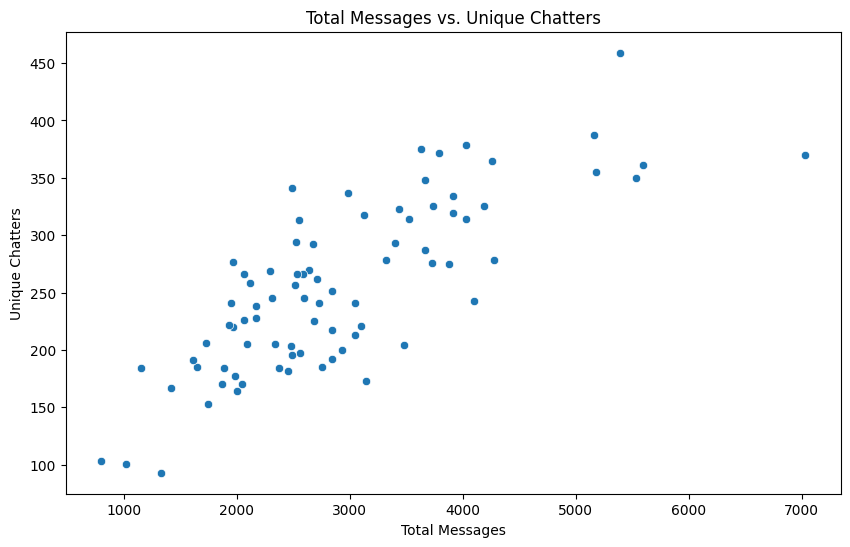

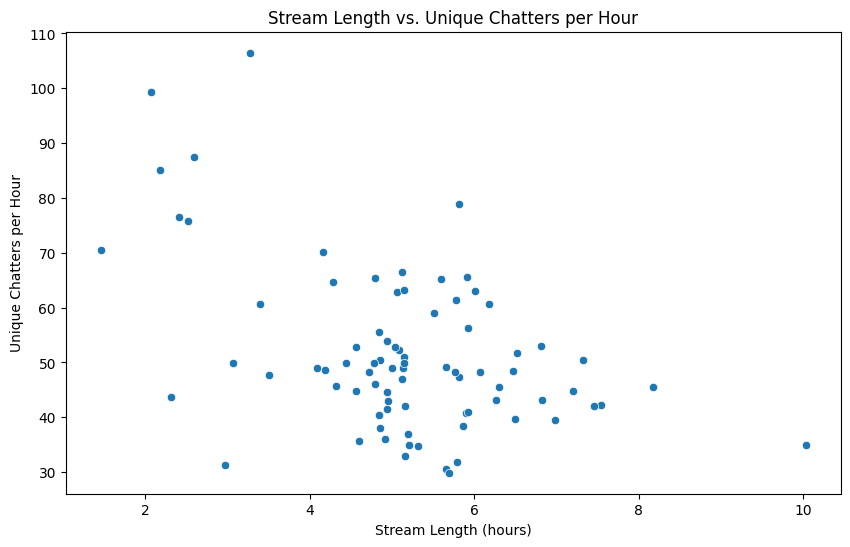

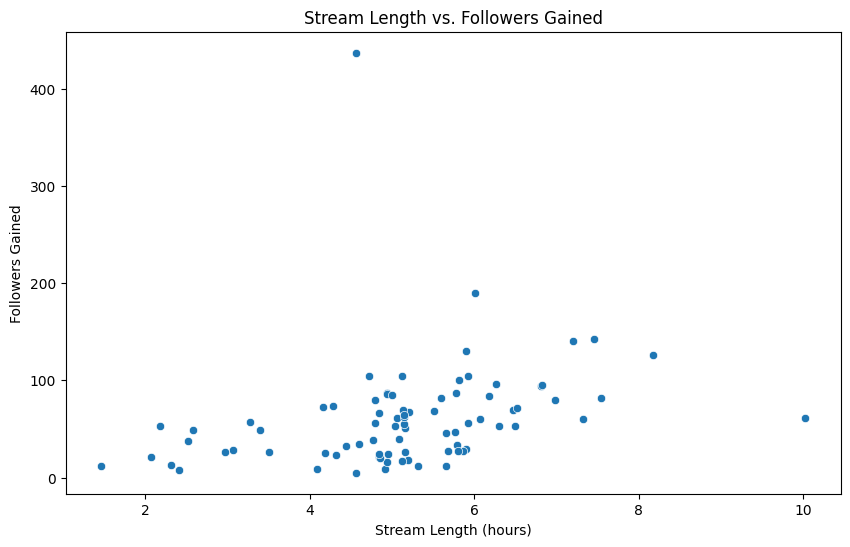

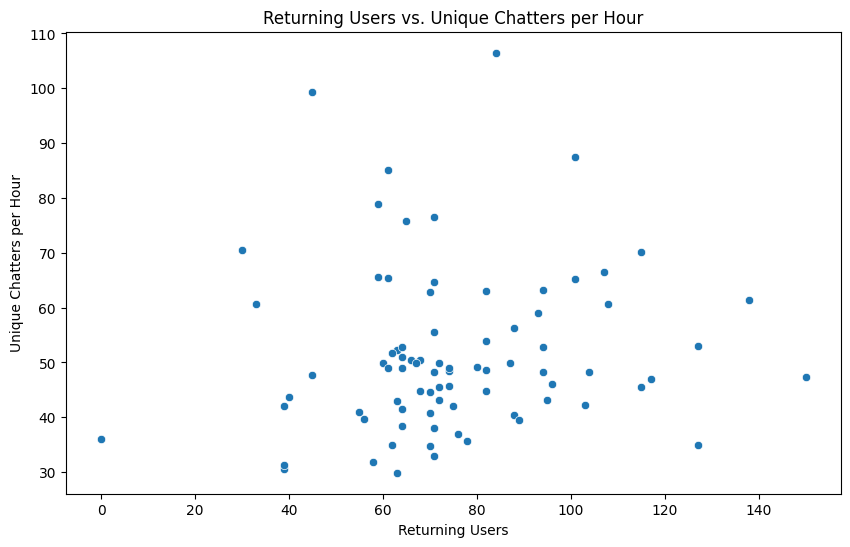

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
# Scatter plot for Total Messages vs. Unique Chatters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=stream_stats['total_messages'], y=stream_stats['unique_chatters'])
plt.title('Total Messages vs. Unique Chatters')
plt.xlabel('Total Messages')
plt.ylabel('Unique Chatters')
plt.show()

# Scatter plot for Stream Length vs. Unique Chatters per Hour
plt.figure(figsize=(10, 6))
sns.scatterplot(x=stream_stats['stream_length_hour'], y=stream_stats['unique_chatters_per_hour'])
plt.title('Stream Length vs. Unique Chatters per Hour')
plt.xlabel('Stream Length (hours)')
plt.ylabel('Unique Chatters per Hour')
plt.show()

# Scatter plot for Stream Length vs. Followers Gained
plt.figure(figsize=(10, 6))
sns.scatterplot(x=stream_stats['stream_length_hour'], y=stream_stats['follow'])
plt.title('Stream Length vs. Followers Gained')
plt.xlabel('Stream Length (hours)')
plt.ylabel('Followers Gained')
plt.show()

# Scatter plot for Returning Users vs. Unique Chatters per Hour
plt.figure(figsize=(10, 6))
sns.scatterplot(x=stream_stats['returning_count'], y=stream_stats['unique_chatters_per_hour'])
plt.title('Returning Users vs. Unique Chatters per Hour')
plt.xlabel('Returning Users')
plt.ylabel('Unique Chatters per Hour')
plt.show()

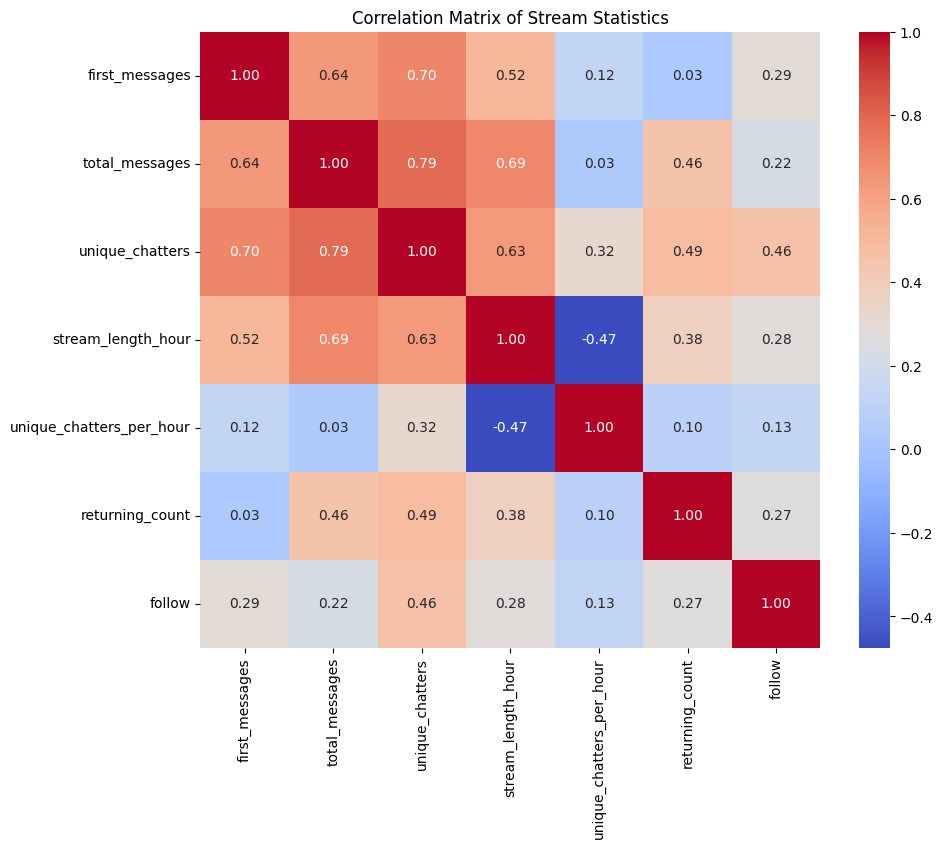

In [32]:
import matplotlib.pyplot as plt

# Correlation matrix for selected columns
correlation_matrix = stream_stats[['first_messages', 'total_messages', 'unique_chatters', 'stream_length_hour', 'unique_chatters_per_hour', 'returning_count', 'follow']].corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Stream Statistics')
plt.show()